# Redes Neuronales y Deep Learning
## Deep Learning y Deep vision

In [ ]:
# SOLO PARA USO EN GOOGLE COLABORATORY
# Para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

BASE_FOLDER = '/content/drive/My Drive/VIU/Docencia/MIAR_04_2021-22/07MAIR/' # Se debe garantizar que la carpeta docencia compartida se almacena en el directorio raíz de Google Drive. En caso contrario modificar este path

Mounted at /content/drive/


## **INTRODUCCIÓN A LAS CONVOLUTIONAL NEURAL NETWORKS: MNIST DATASET**

#### **- Cargando el conjunto de datos**

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step


#### **- Acondicionando el conjunto de datos**

In [ ]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import expand_dims

x_train, x_te = x_train / 255.0, x_test / 255.0 #Cambio al rango 0-1 -> Disminuyo CC
#¿Que pasa si empleo labels con etiquetas número entero?
print(y_train[0])
#y_train = to_categorical(y_train, num_classes=10) #One-hot encoding para minimizar error
#y_te = to_categorical(y_test, num_classes=10)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
#Expandir dimensiones porque en CNN tengo que especificar el número de canales
print(x_tr.shape)
x_tr = expand_dims(x_tr, axis=3)
x_val = expand_dims(x_val, axis=3)
x_te = expand_dims(x_te, axis=3)
print(x_tr.shape)

5
(54000, 28, 28)
(54000, 28, 28, 1)


#### **- Creando la topología de Red Neuronal (CNN) y entrenándola**

In [ ]:
# Construccion de una red CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# Red feedforward API secuencial
convnet = Sequential()

# BASE MODEL
convnet.add(layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))

convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))

convnet.add(layers.Conv2D(64,(3,3),activation='relu'))

#TOP MODEL
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64,activation='relu'))
convnet.add(layers.Dense(10,activation='softmax'))

In [ ]:
convnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
convnet.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy', #If labels are integers
               #loss='categorical_crossentropy', #If labels are one-hot encoded
               metrics=['accuracy'])

In [ ]:
H = convnet.fit(x_tr, y_tr, epochs=5, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/5
422/422 [==============================] - 34s 10ms/step - loss: 0.2397 - accuracy: 0.9279 - val_loss: 0.0716 - val_accuracy: 0.9788
Epoch 2/5
422/422 [==============================] - 4s 9ms/step - loss: 0.0597 - accuracy: 0.9819 - val_loss: 0.0539 - val_accuracy: 0.9858
Epoch 3/5
422/422 [==============================] - 4s 9ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0413 - val_accuracy: 0.9882
Epoch 4/5
422/422 [==============================] - 4s 9ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.0450 - val_accuracy: 0.9853
Epoch 5/5
422/422 [==============================] - 4s 9ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0347 - val_accuracy: 0.9878


#### **- Observando el proceso de entrenamiento para tomar decisiones**

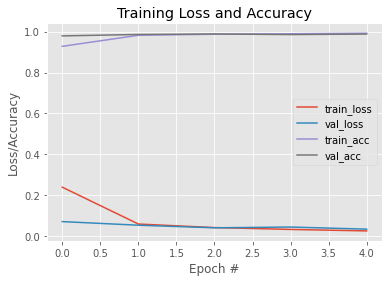

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [ ]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = convnet.predict(x_te, batch_size=128)
#print(y_te[0])
#print(predictions[0])
print(classification_report(y_test, predictions.argmax(axis=1)))

[INFO]: Evaluando red neuronal...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.99      1.00      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## **¿POR QUE CONVOLUTIONAL NEURAL NETWORKS?: CIFAR DATASET**

#### **- Cargando el conjunto de datos y acondicionándolo**

In [ ]:
# Importando el set de datos CIFAR10
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
print("[INFO]: Loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]
print(trainX.shape)
print(trainY.shape)
# Por si es necesario convertir a one-hot encoding
#lb = LabelBinarizer()
#trainY = lb.fit_transform(trainY)
#testY = lb.transform(testY)

[INFO]: Loading CIFAR-10 data...
170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [ ]:
print(testX.shape)
print(testY.shape)

(10000, 32, 32, 3)
(10000, 1)


#### **- Inspeccionando el conjunto de datos**

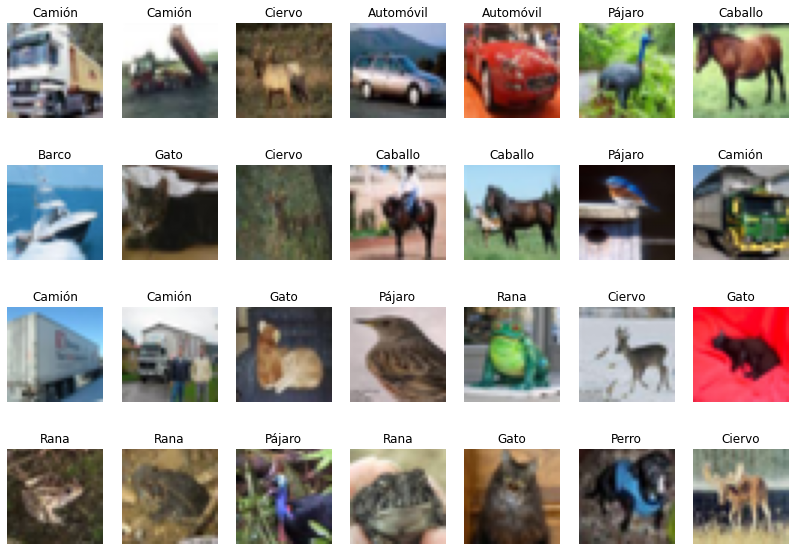

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

#### **- Creando la topología de red neuronal y entrenándola: MLP**

[INFO]: Entrenando red neuronal...
Epoch 1/50
1250/1250 [==============================] - 12s 7ms/step - loss: 1.9156 - accuracy: 0.3086 - val_loss: 1.8385 - val_accuracy: 0.3413
Epoch 2/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6810 - accuracy: 0.3993 - val_loss: 1.6442 - val_accuracy: 0.4018
Epoch 3/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.5889 - accuracy: 0.4342 - val_loss: 1.5899 - val_accuracy: 0.4357
Epoch 4/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.5201 - accuracy: 0.4595 - val_loss: 1.5139 - val_accuracy: 0.4638
Epoch 5/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4649 - accuracy: 0.4780 - val_loss: 1.4861 - val_accuracy: 0.4754
Epoch 6/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.4184 - accuracy: 0.4952 - val_loss: 1.5123 - val_accuracy: 0.4705
Epoch 7/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.3736 - accuracy: 0.508

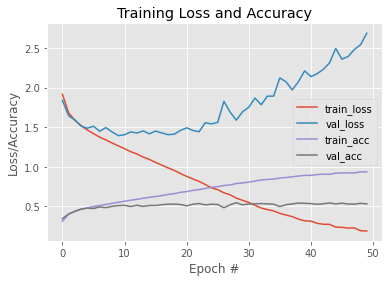

In [ ]:
# Imports necesarios
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Arquitectura de red
# Definimos el modo API Sequential
model = Sequential() #(X)
model.add(Flatten()) #(X)
# Primera capa oculta
model.add(Dense(2048, input_shape=(32*32*3,), activation="relu")) #(X)
#model.add(Dropout(0.5))
# Segunda capa oculta
model.add(Dense(1024, activation="relu")) #(X)
#model.add(Dropout(0.5))
# Tercera capa oculta
model.add(Dense(512, activation="relu")) #(X)
#model.add(Dropout(0.5))
# Cuarta capa oculta
model.add(Dense(128, activation="relu")) #(X)
#model.add(Dropout(0.5))
# Quinta capa oculta
model.add(Dense(32, activation="relu")) #(X)
# Capa de salida
model.add(Dense(10, activation="softmax")) #(X)


# Compilamos el modelo y entrenamos
print("[INFO]: Entrenando red neuronal...")
# Compilamos el modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas en decimal #(X)
# model.compile(loss="categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas binarias #(X)
# Entrenamos el perceptrón multicapa
H = model.fit(trainX, trainY, validation_split=0.2, epochs=50, batch_size=32) #(X)

# Evaluamos con las muestras de test
print("[INFO]: Evaluando modelo...")
# Efectuamos predicciones
predictions = model.predict(testX, batch_size=32) #(X)
# Obtenemos el report
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas en decimal #(X)
# print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas binarias

# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Creando la topología de red neuronal y entrenándola: CNN**

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
313/313 [==============================] - 18s 48ms/step - loss: 1.6399 - accuracy: 0.4602 - val_loss: 3.2959 - val_accuracy: 0.1996
Epoch 2/50
313/313 [==============================] - 14s 45ms/step - loss: 1.0735 - accuracy: 0.6252 - val_loss: 0.9725 - val_accuracy: 0.6577
Epoch 3/50
313/313 [==============================] - 14s 45ms/step - loss: 0.8580 - accuracy: 0.6999 - val_loss: 0.9051 - val_accuracy: 0.6921
Epoch 4/50
313/313 [==============================] - 14s 45ms/step - loss: 0.7192 - accuracy: 0.7465 - val_loss: 0.7419 - val_accuracy: 0.7425
Epoch 5/50
313/313 [==============================] - 14s 45ms/step - loss: 0.6349 - accuracy: 0.7753 - val_loss: 0.7012 - val_accuracy: 0.7642
Epoch 6/50
313/313 [==============================] - 14s 45ms/step - loss: 0.5761 - accuracy: 0.7991 - val_loss: 0.9048 - val_accuracy: 0.7036
Epoch 7/50
313/313 [==============================] - 14s 45ms/step - loss: 0.5203 - accuracy: 0.8159 - val_loss: 0.6401 - val_accuracy:

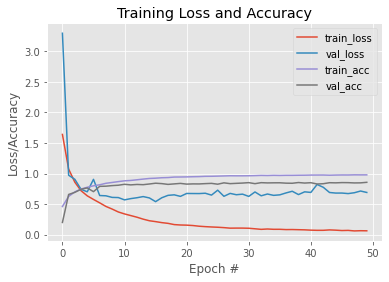

In [ ]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

n_epochs=50
#########################################
###### Definimos la arquitectura ########
#########################################
#BASE MODEL
# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs) 
x1 = BatchNormalization()(x1) 
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1) 
x1 = BatchNormalization()(x1) 
x1 = MaxPooling2D(pool_size=(2, 2))(x1) 
x1 = Dropout(0.25)(x1) 

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1) #(X)
x2 = BatchNormalization()(x2) #(X)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2) #(X)
x2 = BatchNormalization()(x2) #(X)
x2 = MaxPooling2D(pool_size=(2, 2))(x2) #(X)
x2 = Dropout(0.25)(x2) #(X)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2) #(X)
x3 = BatchNormalization()(x3) #(X)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3) #(X)
x3 = BatchNormalization()(x3) #(X)
x3 = MaxPooling2D(pool_size=(2, 2))(x3) #(X)
x3 = Dropout(0.25)(x3) #(X)

# TOP MODEL
# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3) #(X)
xfc = Dense(512, activation="relu")(xfc) #(X)
xfc = BatchNormalization()(xfc) #(X)
xfc = Dropout(0.5)(xfc) #(X)
# Clasificador softmax
predictions = Dense(10, activation="softmax")(xfc) #(X)

# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
model_cnn = Model(inputs=inputs, outputs=predictions) #(X)

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_cnn.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"]) #(X)

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model_cnn.fit(trainX, trainY, validation_split=0.2, batch_size=128, epochs=n_epochs, verbose=1) #(X)

# Almaceno el modelo en Drive
# Montamos la unidad de Drive
drive.mount('/content/drive') #(X)
# Almacenamos el modelo empleando la función mdoel.save de Keras
model_cnn.save(BASE_FOLDER+"deepCNN_CIFAR10.h5") #(X)

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_cnn.predict(testX, batch_size=128) #(X)
# Sacamos el report para test
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) #(X)

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## **REDUCIENDO OVERFITTING MEDIANTE DATA AUGMENTATION**

#### **- Acondicionando dataset**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
# Por si es necesario convertir a one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
print(trainY.shape)
print(testY.shape)

(50000, 10)
(10000, 10)


#### **- Creando un contenedor DataGenerator para el aumento automático de muestras**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15, # grados de rotacion aleatoria
    width_shift_range=0.2, # fraccion del total (1) para mover la imagen
    height_shift_range=0.2, # fraccion del total (1) para mover la imagen
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    # shear_range=0, # deslizamiento
    zoom_range=0.2, # rango de zoom
    # fill_mode='nearest', # como rellenar posibles nuevos pixeles
    # channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen
)

#### **- Inspeccionando las muestras generadas sintéticamente**

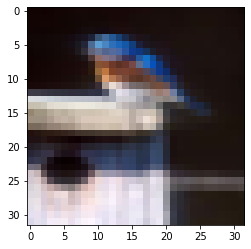

Label = Pájaro


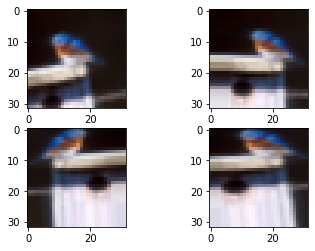

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 13
plt.imshow(image.array_to_img(trainX[sample]))
plt.show()
print('Label = {}'.format(labelNames[trainY[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(trainX[sample].reshape((1,32,32,3)),batch_size=1):
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

#### **- Creando la topología de red neuronal y entrenándola: CNN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive'

'[07MAIR_04_A_2018-19] Actividad1_corrección_1conv'
 07MIAR_PracticaObservacional
 07MIAR_Proyecto_Programacion
'Actividad 1'
'Cesión Derechos Imagen VIU.docx'
'Colab Notebooks'
'Docentes MAIR'
'FICHAS ASIGNATURAS'
'FICHAS DOCENTES'
 Francesc_Perez_Pascual.gdoc
 HOLA.gdoc
 Isabel_Vázquez_Trigas.gdoc
 MAIR_MARKETING
 Panel_12_05_2020
 Redes_Neuronales.ipynb
 TESTIMONIALES
 TFM_LauraVelaSampedro_21042021.pdf
 training_CAE.ipynb
 Victor_Dot_Mariano.gdoc
 VIU


[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/50
391/390 [==============================] - 28s 72ms/step - loss: 1.6073 - accuracy: 0.4650 - val_loss: 2.1563 - val_accuracy: 0.3214
Epoch 2/50
391/390 [==============================] - 28s 71ms/step - loss: 1.0984 - accuracy: 0.6101 - val_loss: 0.9950 - val_accuracy: 0.6575
Epoch 3/50
391/390 [==============================] - 28s 72ms/step - loss: 0.9295 - accuracy: 0.6713 - val_loss: 1.6674 - val_accuracy: 0.5454
Epoch 4/50
391/390 [==============================] - 28s 71ms/step - loss: 0.8523 - accuracy: 0.7026 - val_loss: 0.9277 - val_accuracy: 0.6814
Epoch 5/50
391/390 [==============================] - 28s 70ms/step - loss: 0.7605 - accuracy: 0.7351 - val_loss: 0.9631 - val_accuracy: 0.6986
Epoch 6/50
391/390 [==============================] - 28s 71ms/step - loss: 0.7058 - accuracy: 0.7547 - val_loss: 0.7450 - val_accuracy: 0.7574
Epoch 7/50
391/390 [==============================] - 28s 71ms/step - loss:

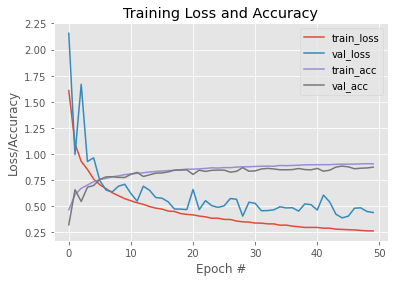

In [ ]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

#########################################
###### Definimos la arquitectura ########
#########################################
# Definimos entradas
inp = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inp) 
x1 = BatchNormalization()(x1) 
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1) 
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1) 
x1 = Dropout(0.25)(x1) 

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1) 
x2 = BatchNormalization()(x2) 
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2) 
x2 = BatchNormalization()(x2) 
x2 = MaxPooling2D(pool_size=(2, 2))(x2) 
x2 = Dropout(0.25)(x2) 

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2) 
x2 = BatchNormalization()(x2) 
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2) 
x2 = BatchNormalization()(x2) 
x2 = MaxPooling2D(pool_size=(2, 2))(x2) 
x2 = Dropout(0.25)(x2) 

# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x2) 
xfc = Dense(512, activation="relu")(xfc) 
xfc = BatchNormalization()(xfc) 
xfc = Dropout(0.5)(xfc) 
# Clasificador softmax
predictions = Dense(10, activation="softmax")(xfc) 

# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
model_aug = Model(inputs=inp, outputs=predictions) 

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_aug.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_aug = model_aug.fit(datagen.flow(trainX, trainY, batch_size=128),
                                steps_per_epoch = len(trainX)*2/ 128, epochs=50, validation_data=(testX, testY))
# Almaceno el modelo en Drive
# Montamos la unidad de Drive
drive.mount('/content/drive') 
# Almacenamos el modelo empleando la función mdoel.save de Keras
model_aug.save(BASE_FOLDER+"deepCNN_CIFAR10_aug.h5") 

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model_aug.predict(testX, batch_size=128) 
# Sacamos el report para test
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) 

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H_aug.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H_aug.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H_aug.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H_aug.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

**EJERCICIO PROPUESTO:** Modificar la ejecución con Data Augmentation para que sea directamente comparable a la ejecución por defecto. Para ello, el validation data debe ser correcto. Pista: Llevar a cabo el validation split cuando se instancia el objeto ImageDataGenerator. El método flow también se verá afectado (leer documentación).

## **TRABAJANDO CON REDES PRE-ENTRENADAS: TRANSFER LEARNING & FINE-TUNING**


#### **- Cargando el conjunto de datos y acondicionándolo como en la VGG**

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import imagenet_utils
from sklearn.preprocessing import LabelBinarizer

# Importando y normalizando el set de datos CIFAR10
print("[INFO]: Loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

#One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# IMPORTANTE: Se normalizan los datos como se normalizaron en el entrenamiento con ImageNet!!
trainX = imagenet_utils.preprocess_input(trainX)
testX = imagenet_utils.preprocess_input(testX)

#print(trainX.shape)
#print(trainY.shape)

2022-10-20 11:30:46.522117: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[INFO]: Loading CIFAR-10 data...


#### **- Cargando la topología de CNN (base model)**

In [2]:
#keras incluye varias arquitecturas
# VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet
# documentacion https://keras.io/applications/
# Visual Geometry Group 16 / 19 (numero de layers)
# 1 y 2 en la competicion ImageNet 2014
# Kernels pequeños de 3x3

from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet',
                 include_top=False, # No incluir el top model, i.e. la parte densa destinada a la clasificación (fully connected layers)
                 input_shape=(32,32,3))
base_model.summary()

2022-10-20 11:31:33.322465: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

#### **- Creando el top model y congelando TODAS las capas convolucionales (TRANSFER LEARNING)**

In [3]:
# conectarlo a nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(10, activation='softmax'))

pre_trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


#### **- Entrenando la solución**

In [5]:
# Import the necessary packages
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
#from google.colab import drive

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0005,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"]) 

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = pre_trained_model.fit(trainX, trainY, batch_size=128, epochs=20, validation_split=0.2)
# Almaceno el modelo en Drive
# Montamos la unidad de Drive
#drive.mount('/content/drive') 
# Almacenamos el modelo empleando la función mdoel.save de Keras
pre_trained_model.save("deepCNN_CIFAR10_pretrained.h5") #(X)

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = pre_trained_model.predict(testX, batch_size=128)
# Sacamos el report para test
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) 

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H_pre.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H_pre.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H_pre.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H_pre.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...


/opt/anaconda3/envs/intro/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
313/313 [==============================] - 193s 612ms/step - loss: 3.6582 - accuracy: 0.5031 - val_loss: 2.1433 - val_accuracy: 0.5537
Epoch 2/20
313/313 [==============================] - 170s 543ms/step - loss: 1.5654 - accuracy: 0.6135 - val_loss: 1.6715 - val_accuracy: 0.5874
Epoch 3/20
313/313 [==============================] - 173s 552ms/step - loss: 1.1037 - accuracy: 0.6731 - val_loss: 1.5074 - val_accuracy: 0.5995
Epoch 4/20
205/313 [==================>...........] - ETA: 53s - loss: 0.8542 - accuracy: 0.7252

KeyboardInterrupt: 

#### **- Creando el top model y descongelando bloques convolucionales (FINE TUNING)**

In [ ]:
# Imports que vamos a necesitar
%tensorflow_version 1.x
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

#Cargamos el dataset CIFAR10
(trainX, trainY), (testX, testY) = cifar10.load_data() 

# Normalizamos las entradas de idéntica forma a como lo hicieron para entrenar la VGG16 en imageNet
trainX = imagenet_utils.preprocess_input(trainX) 
testX = imagenet_utils.preprocess_input(testX) 

# Definimos dimensiones de nuestros datos de entrada y lista con las categorias de las clases
input_shape = (32, 32, 3) 
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"] 

# En caso de inestabilidades numéricas pasar datos a one-hot encoding
trainY = to_categorical(trainY) 
testY = to_categorical(testY) 

# Importamos VGG16 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
# Mostramos la arquitectura
base_model.summary()

# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in base_model.layers: 
  if layer.name == 'block3_conv1': 
    break 
  layer.trainable = False 
  print('Capa ' + layer.name + ' congelada...') 

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output 
x = Flatten()(last) 
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x) 
x = Dense(256, activation='relu', name='fc2')(x) 
x = Dense(10, activation='softmax', name='predictions')(x) 
model = Model(base_model.input, x) 

# Compilamos el modelo
optimizer=SGD(lr=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) 

# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
# ¿tiene sentido en comparación al ejemplo de transfer learning?
model.summary() 

# Entrenamos el modelo
H = model.fit(trainX, trainY, validation_split=0.2, batch_size=64, epochs=20, verbose=1) 

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
predictions = model.predict(testX, batch_size=64) 
# Obtener el report de clasificación
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) 

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

**EJERCICIO PROPUESTO 1:** Sacar el entrenamiento del mínimo local.

**EJERCICIO PROPUESTO 2:** Combinar fine tuning con la técnica de data augmentation para reducir overfitting.